In [93]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
%matplotlib inline

In [2]:
text = pd.read_parquet("../data/tour-text.parquet").drop_duplicates(subset='tour_id')

In [3]:
text

tour_id           sub_category_label category_type  \
0          853          guided_walking_tour   Within city   
1         6557                     day_trip  Outside city   
2        14812            guided_experience   Within city   
3        15216          guided_walking_tour   Within city   
4        15584                     day_trip  Outside city   
5        16257            guided_experience   Within city   
6        17904        guided_motorized_tour   Within city   
7        19063                     day_trip  Outside city   
8        21306                     day_trip  Outside city   
9        22003          guided_walking_tour   Within city   
10       22713          guided_walking_tour   Within city   
11       25601                     day_trip  Outside city   
12       28147                     day_trip  Outside city   
13       30397        guided_motorized_tour   Within city   
14       31319            guided_experience   Within city   
15       32860                     day_trip  Outside city   
16       35191          guided_walking_tour   Within city   
17       36733        guided_motorized_tour   Within city   
18       37415                     day_trip  Outside city   
19       38199                     day_trip  Outside city   
20       38357                     day_trip  Outside city   
21       38438        guided_motorized_tour   Within city   
22       38452  guided_mixed_transport_tour   Within city   
23       40016                     day_trip  Outside city   
24       40970                     day_trip  Outside city   
25       42545          guided_walking_tour   Within city   
26       45684                     day_trip  Outside city   
27       49182            guided_experience   Within city   
28       53467        guided_motorized_tour   Within city   
29       54146        guided_motorized_tour   Within city   
...        ...                          ...           ...   
21761   134685                     day_trip  Outside city   
21762   136172          guided_walking_tour   Within city   
21763   137276          guided_walking_tour   Within city   
21764   137606                     day_trip  Outside city   
21765   137648                     day_trip  Outside city   
21766   138659            guided_experience   Within city   
21767   139956        guided_motorized_tour   Within city   
21768   142239        guided_motorized_tour   Within city   
21769   142947        guided_motorized_tour   Within city   
21770   143052  guided_mixed_transport_tour   Within city   
21771   143625            guided_experience   Within city   
21772   149051                     day_trip  Outside city   
21773   150920          guided_walking_tour   Within city   
21774   150944                     day_trip  Outside city   
21775   152640        guided_motorized_tour   Within city   
21776   153369        guided_motorized_tour   Within city   
21777   156552                     day_trip  Outside city   
21778   156948                     day_trip  Outside city   
21779   160022                     day_trip  Outside city   
21780   164883        guided_motorized_tour   Within city   
21781   171933                     day_trip  Outside city   
21782   172584          guided_walking_tour   Within city   
21783   178215          guided_walking_tour   Within city   
21784   181490        guided_motorized_tour   Within city   
21785   182480           guided_city_cruise   Within city   
21786   183314                     day_trip  Outside city   
21787   183905          guided_walking_tour   Within city   
21788   184424                     day_trip  Outside city   
21789   185208          guided_walking_tour   Within city   
21790   186147        guided_motorized_tour   Within city   

                      product_type               poi_type_name   country_name  \
0              Guided Walking Tour           Castles & Palaces        Austria   
1                         Day Trip           Castles & Palaces

In [4]:
vectors = pd.read_parquet("../data/tour-vectors.parquet").set_index('tour_id')

In [5]:
text['documents'] = text.apply(lambda doc: TaggedDocument(doc.tokens, [str(doc.tour_id), str(doc.main_topic_id+1), doc.poi_type_name]), axis=1)

In [8]:
max_epochs = 500
vec_size = 300
alpha = 0.05
NUM_WORKERS = 64

model = Doc2Vec(vector_size=vec_size, alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1,
                dbow_words=1,
                workers=NUM_WORKERS)

model.build_vocab(text.documents.values)

In [9]:
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(text.documents.values,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha *= 0.995
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

In [6]:
#model.save('d2v_tourtext_3.pck')
model = Doc2Vec.load('d2v_tourtext_3.pck')

In [7]:
model.docvecs.most_similar(positive=[model.docvecs.index2entity.index('35191')])

/home/bobbruno/.virtualenvs/text-analysis-Bt4JqtsQ/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('86957', 0.2430761754512787),
 ('137159', 0.23187309503555298),
 ('74543', 0.22493669390678406),
 ('144930', 0.21835951507091522),
 ('110767', 0.21832707524299622),
 ('43997', 0.20915129780769348),
 ('58317', 0.20860010385513306),
 ('152361', 0.20842094719409943),
 ('115813', 0.20760437846183777),
 ('69745', 0.20691928267478943)]

In [8]:
from numpy.random import choice

In [114]:
sample_size = 9000
plot_data = text.tour_id.iloc[choice(text.shape[0], sample_size, False)].values

In [115]:
plot_data_d2v = np.array([model.docvecs.index2entity.index(str(p)) for p in plot_data])

In [116]:
def joinVecs(i):
    try:
        if (vectors.index.contains(plot_data[i])):
            return np.concatenate([model.docvecs.vectors_docs[plot_data_d2v[i]], 
                                   vectors.loc[plot_data[i]].values[0]])
        else:
            return np.concatenate([model.docvecs.vectors_docs[plot_data_d2v[i]], np.zeros(300)])
    except:
        print( i)
        raise

cluster_vectors = np.array([joinVecs(x) for x in range(sample_size)])

In [144]:
#from tsnecuda import TSNE
from MulticoreTSNE import MulticoreTSNE as TSNE
perplexities = [3.0, 5.0, 10.0, 30.0, 40]
tsne_articles = []
for perp in perplexities:
    tsne_model = TSNE(n_components=2, verbose = 2, perplexity=perp, learning_rate=50.0, early_exaggeration=45,
                      n_iter=30000, metric='cosine', n_jobs=16)
    tsne_articles.append(tsne_model.fit_transform(cluster_vectors))

In [148]:
import pickle

with open('tsne_3_5_10_30_40.pcl', "wb") as dest:
    pickle.dump(tsne_articles, dest)

In [145]:
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import matplotlib.patches as mpatches

color_col = ['sub_category_label', 'category_type', 'product_type', 'poi_type_name',
             'country_name', 'continent_name', 'main_topic_id'][2]

types = {k: v for (v, k) in enumerate(text.set_index('tour_id')[color_col].loc[plot_data].unique())}
norm = matplotlib.colors.Normalize(vmin=0., vmax=len(types), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.tab20b)
patches = [mpatches.Patch(color=mapper.to_rgba(v, alpha=0.5), label=k) for (k, v) in types.items()]


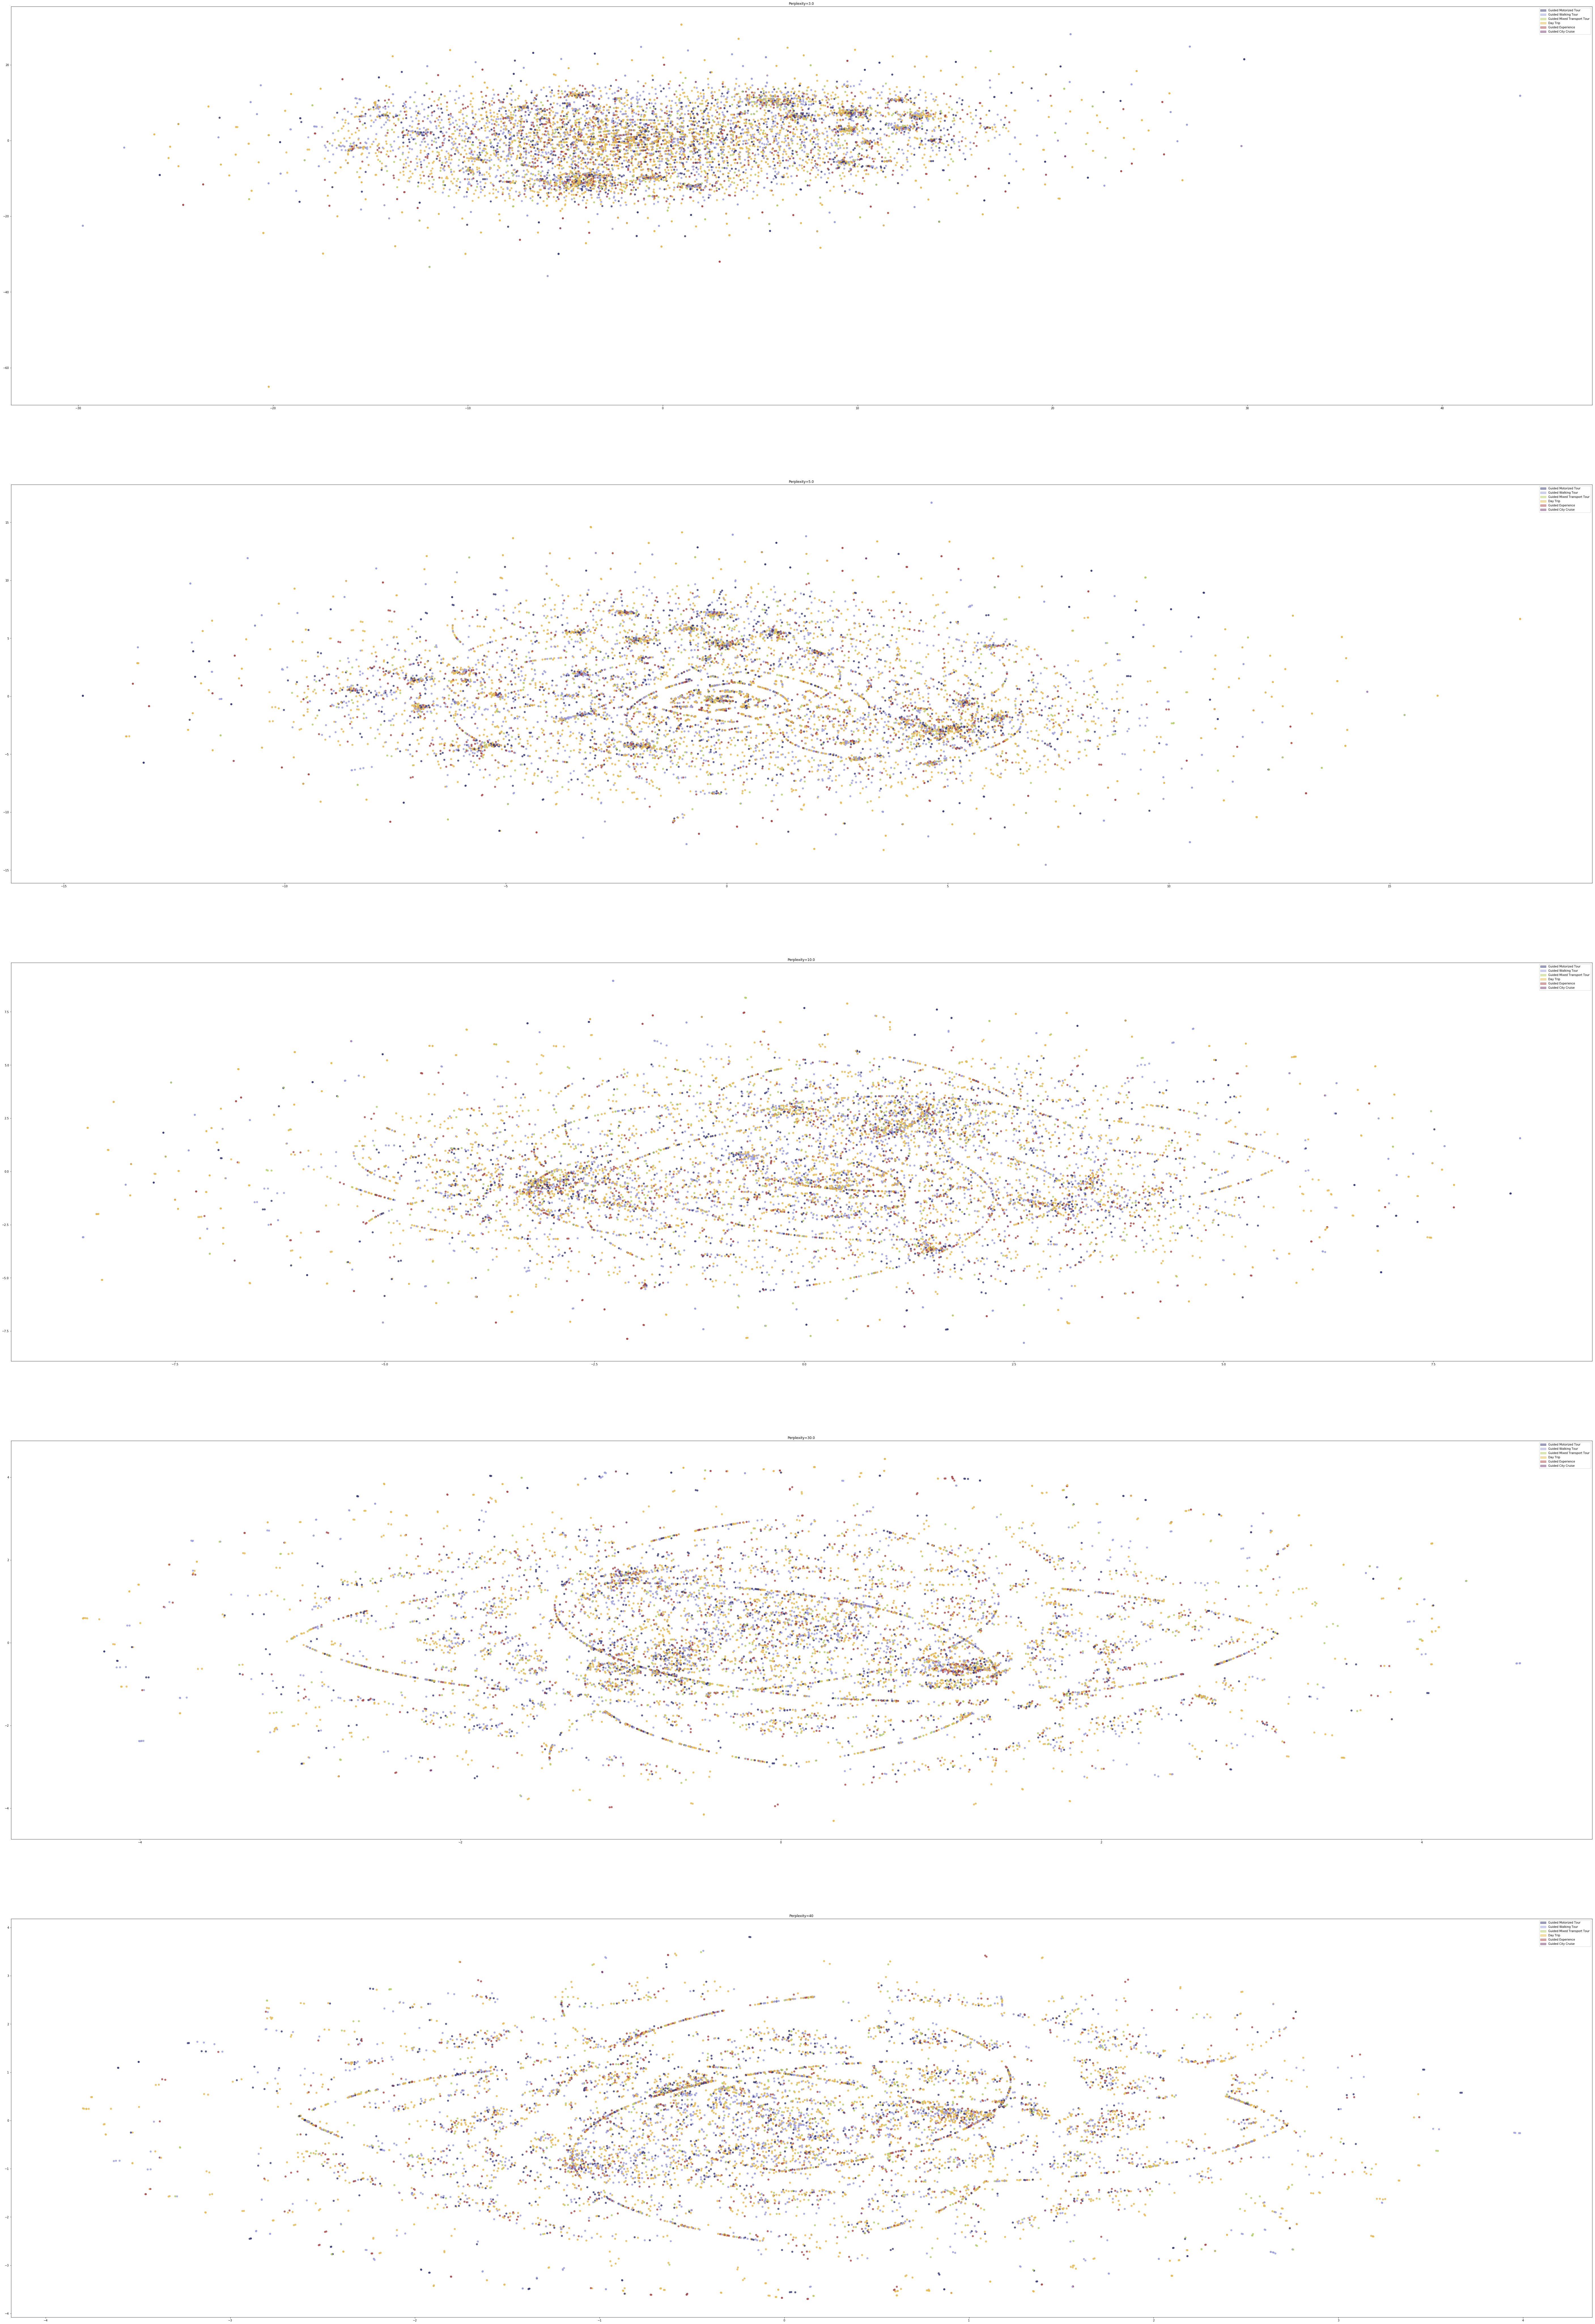

In [146]:
fig, ax = plt.subplots(len(perplexities), 1, figsize=(20*5, 30*5))

for i in range(len(perplexities)):
    ax[i].scatter(tsne_articles[i][:,0], tsne_articles[i][:,1], 
           c=[mapper.to_rgba(types[x], alpha=0.8 if x != 'Others' else 0.001) for x in text.set_index('tour_id')[color_col].loc[plot_data]])
    ax[i].set_title(f'Perplexity={perplexities[i]}', )
    ax[i].legend(handles=patches)
fig.show();
#plt.close(fig)